## Table of Contents
1. Introduction
2. Import Libraries
3. Load Dataset
4. Data Understanding
5. Data Cleaning
6. Exploratory Data Analysis (EDA)
7. Feature Engineering
8. Train-Test Split
9. Model Building
10. Model Comparison
11. Feature Importance
12. Conclusion & Future Work
13. Business Insights

# Predicting On-Time Delivery in E-Commerce: A Machine Learning Approach

This project analyzes an international e-commerce dataset to predict whether products will reach customers on time. Using machine learning, we aim to uncover key factors affecting delivery performance and provide actionable business insights.

**Dataset:** E-Commerce delivery records with features on shipment, customer, and logistics.

**Objectives:**
- Explore and clean the data
- Build and compare classification models
- Identify important features
- Provide business recommendations

## Importing Required Libraries
We use the following libraries:
- **pandas, numpy:** Data manipulation and analysis
- **matplotlib, seaborn:** Data visualization
- **scikit-learn:** Machine learning models and evaluation
- **warnings:** To suppress unnecessary warnings

In [4]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Machine Learning - Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading the Dataset
We load the e-commerce delivery dataset. This data contains shipment, customer, and logistics information for each order.

In [5]:
df = pd.read_csv('/Users/sanyam/Desktop/BIA Poject/E_Commerce.csv')
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


## Data Understanding
In this section, we explore the dataset’s structure, column types, and initial statistics to understand what information is available and identify potential issues.

In [6]:
# Check number of rows and columns
df.shape

(10999, 12)

In [7]:
# Display column names
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [8]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


## Data Cleaning
We check for missing values, duplicates, and outliers to ensure the data is accurate and ready for analysis. Proper cleaning is essential for building reliable models.

In [9]:
# Check missing values in each column
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [10]:
# Statistical summary
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [11]:
# Unique values in categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

Warehouse_block: 5 unique values
Mode_of_Shipment: 3 unique values
Product_importance: 3 unique values
Gender: 2 unique values


In [12]:
# Check duplicate rows
df.duplicated().sum()

np.int64(0)

In [13]:
# Check distribution of target variable
df['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

In [14]:
df['Reached.on.Time_Y.N'].value_counts(normalize=True) * 100

Reached.on.Time_Y.N
1    59.669061
0    40.330939
Name: proportion, dtype: float64

## Exploratory Data Analysis (EDA)
We visualize and analyze the data to uncover patterns, trends, and relationships. EDA helps us understand the factors influencing on-time delivery.

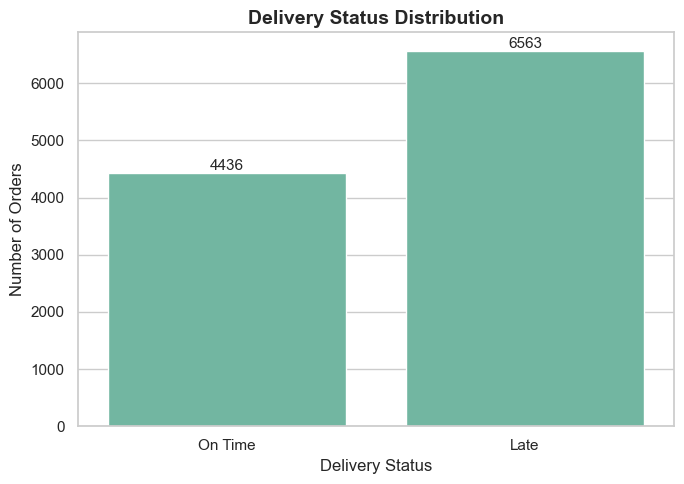

In [15]:
# Set a clean style
sns.set(style="whitegrid", palette="Set2")

# Create figure
plt.figure(figsize=(7, 5))

# Plot
ax = sns.countplot(
    x='Reached.on.Time_Y.N',
    data=df
)

# Improve labels
ax.set_title("Delivery Status Distribution", fontsize=14, fontweight='bold')
ax.set_xlabel("Delivery Status", fontsize=12)
ax.set_ylabel("Number of Orders", fontsize=12)

# Replace 0/1 with meaningful labels
ax.set_xticklabels(["On Time", "Late"])

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=11
    )

plt.tight_layout()
plt.savefig("delivery_status_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

In [16]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [17]:
num_features = numerical_cols.drop('Reached.on.Time_Y.N')

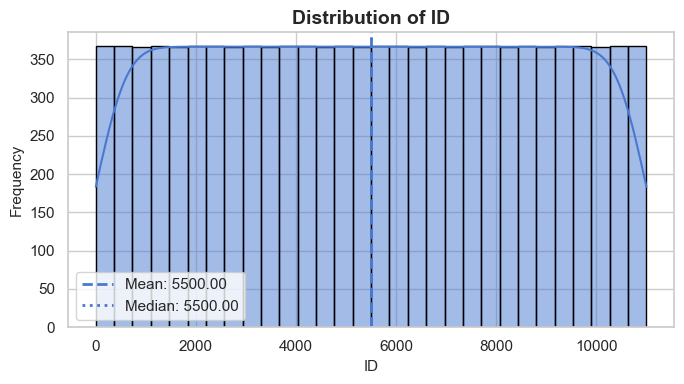

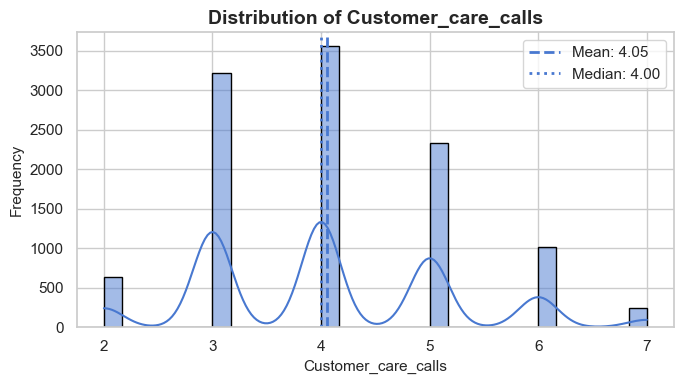

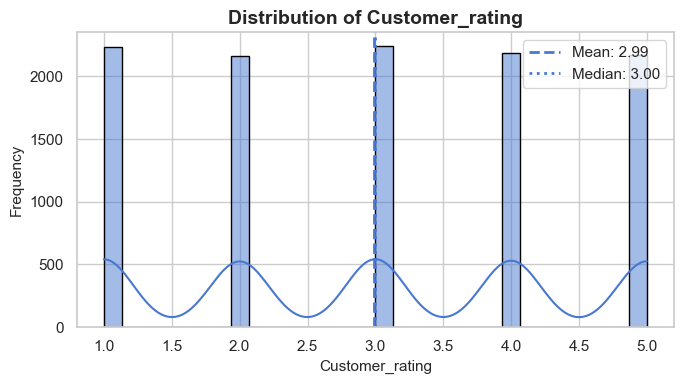

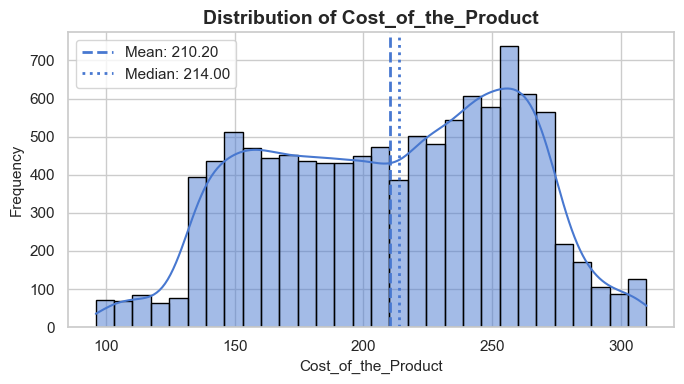

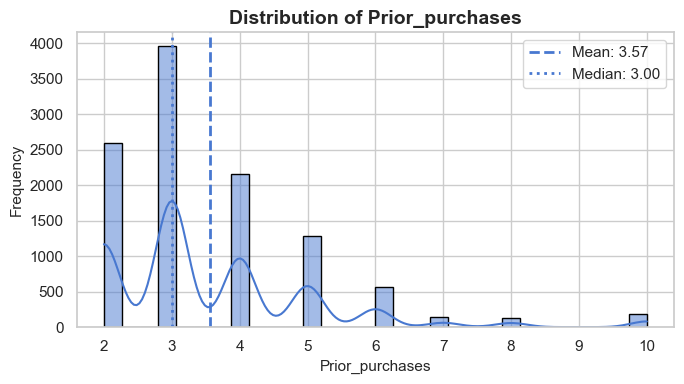

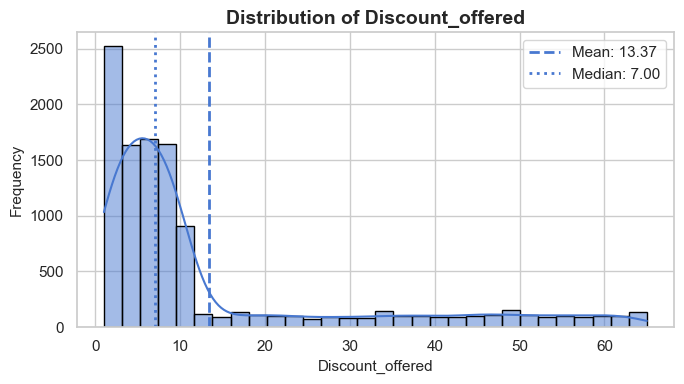

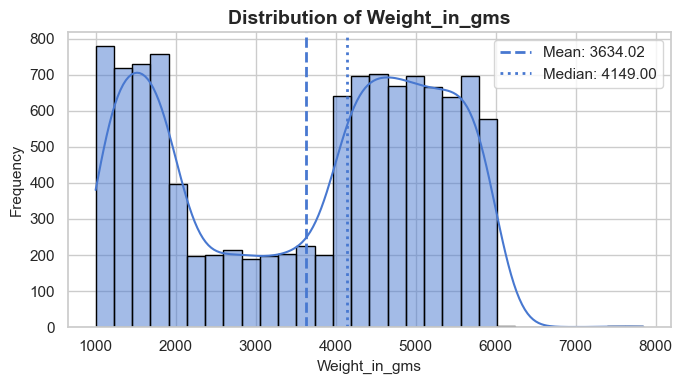

In [18]:
# Global style
sns.set(style="whitegrid", palette="muted")

for col in num_features:
    plt.figure(figsize=(7, 4))

    # Histogram with KDE
    sns.histplot(
        df[col],
        bins=30,
        kde=True,
        edgecolor="black"
    )

    # Mean & Median
    mean_val = df[col].mean()
    median_val = df[col].median()

    plt.axvline(mean_val, linestyle='--', linewidth=2, label=f"Mean: {mean_val:.2f}")
    plt.axvline(median_val, linestyle=':', linewidth=2, label=f"Median: {median_val:.2f}")

    # Titles & labels
    plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=11)
    plt.ylabel("Frequency", fontsize=11)

    # Legend
    plt.legend()

    plt.tight_layout()
    plt.savefig("4.png", dpi=300, bbox_inches='tight')
    plt.show()


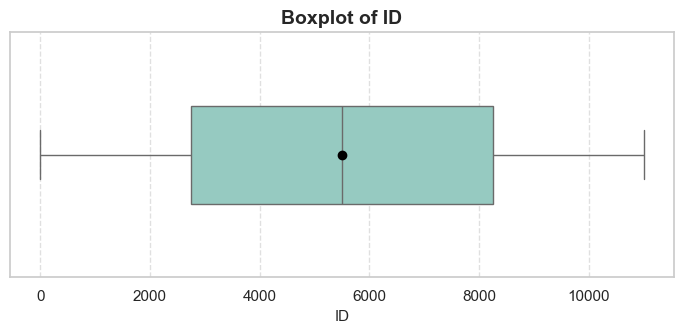

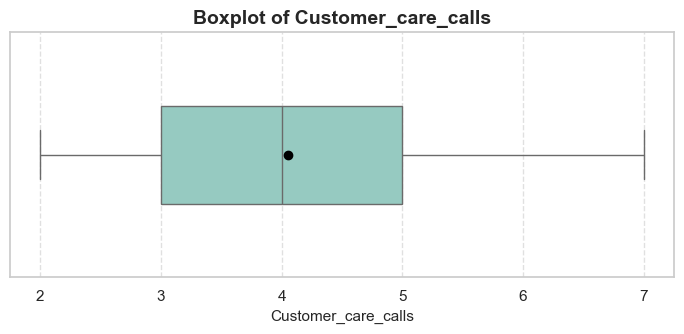

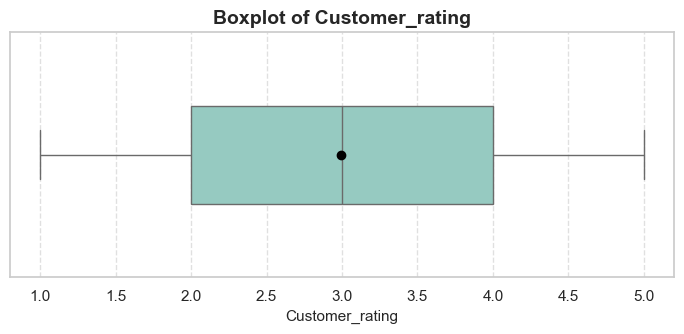

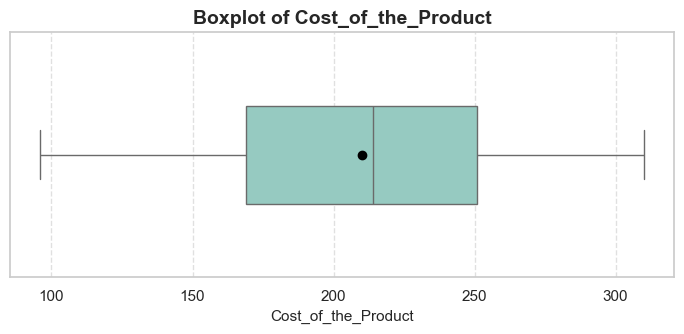

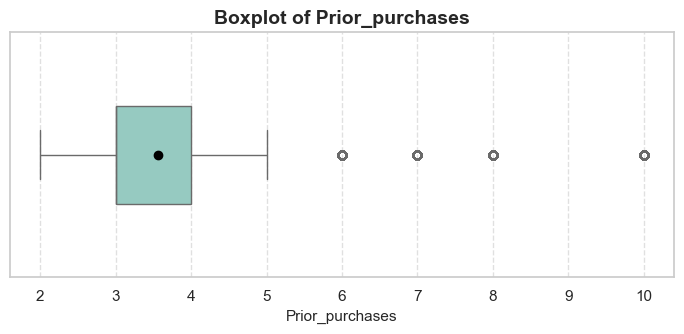

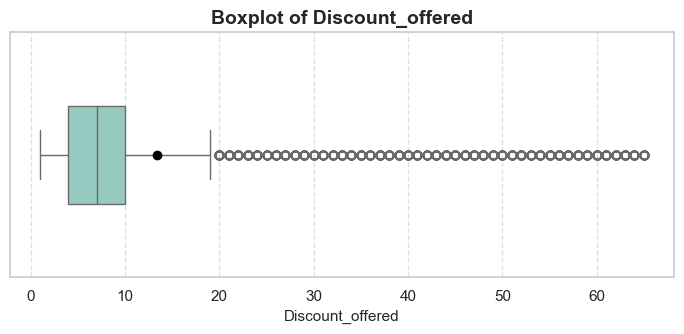

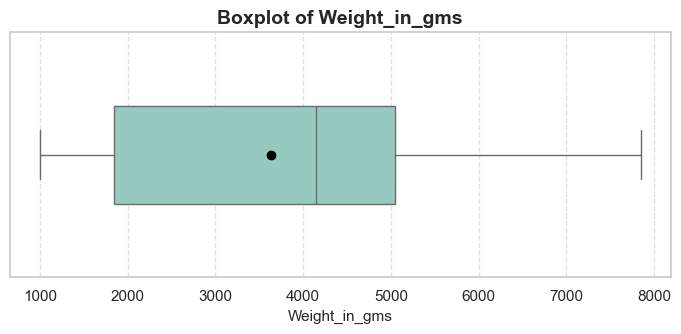

In [19]:
# Global style
sns.set(style="whitegrid", palette="Set3")

for col in num_features:
    plt.figure(figsize=(7, 3.5))

    # Boxplot
    ax = sns.boxplot(
        x=df[col],
        width=0.4,
        showmeans=True,
        meanprops={
            "marker": "o",
            "markerfacecolor": "black",
            "markeredgecolor": "black",
            "markersize": 6
        }
    )

    # Titles & labels
    ax.set_title(f"Boxplot of {col}", fontsize=14, fontweight="bold")
    ax.set_xlabel(col, fontsize=11)

    # Subtle grid
    ax.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.savefig("5.png", dpi=300, bbox_inches='tight')
    plt.show()


In [20]:
# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')

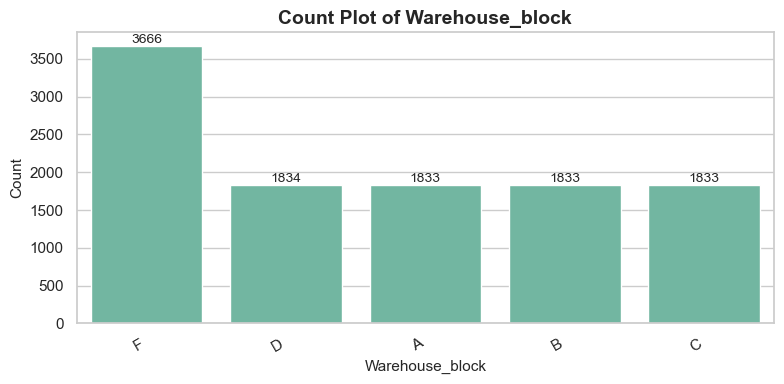

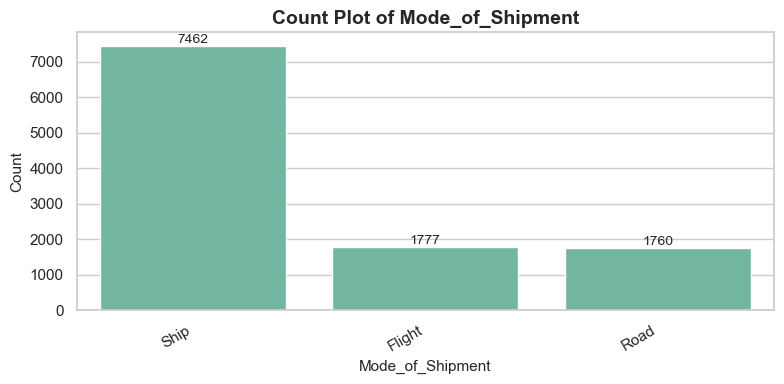

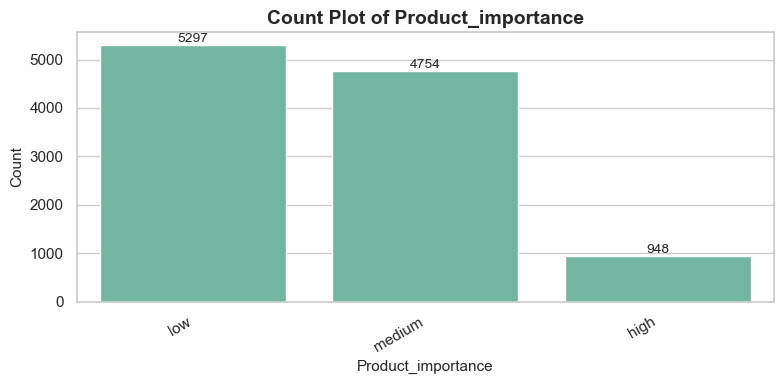

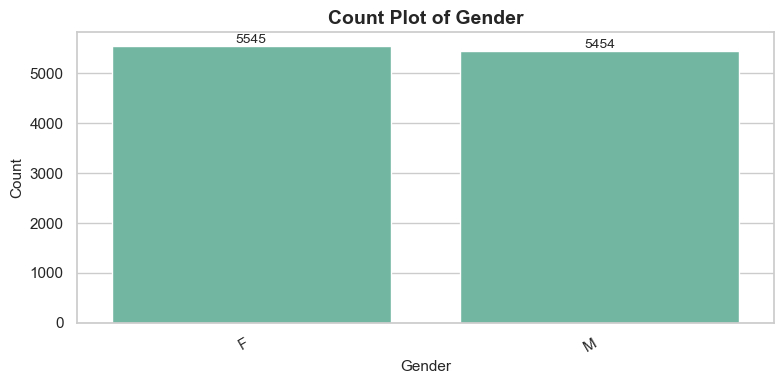

In [21]:
# Global style
sns.set(style="whitegrid", palette="Set2")

for col in categorical_cols:
    plt.figure(figsize=(8, 4))

    ax = sns.countplot(
        x=col,
        data=df,
        order=df[col].value_counts().index
    )

    # Titles & labels
    ax.set_title(f"Count Plot of {col}", fontsize=14, fontweight="bold")
    ax.set_xlabel(col, fontsize=11)
    ax.set_ylabel("Count", fontsize=11)

    # Rotate labels only if needed
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

    # Add counts on bars
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=10
        )

    plt.tight_layout()
    plt.savefig("2.png", dpi=300, bbox_inches='tight')
    plt.show()


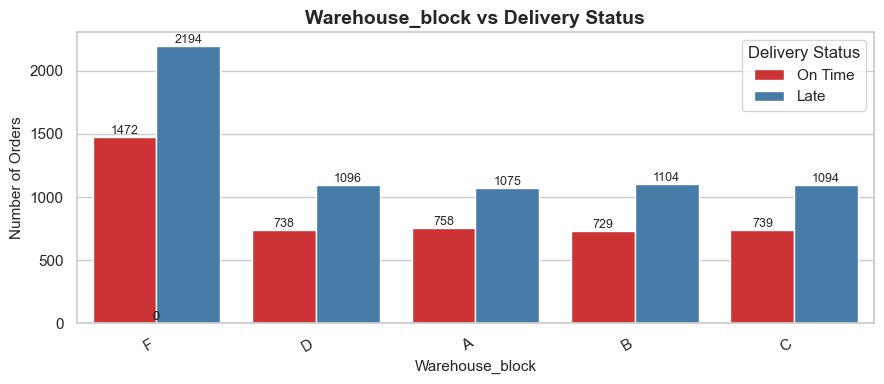

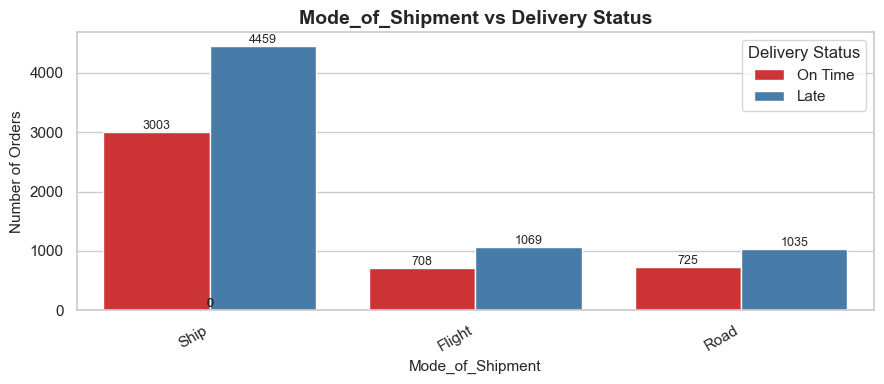

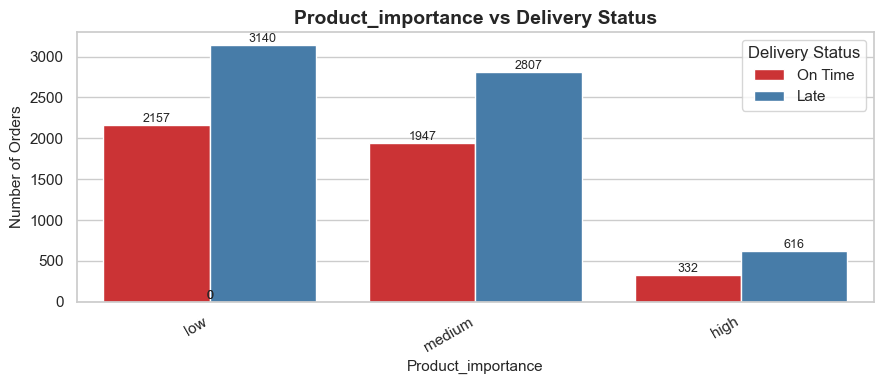

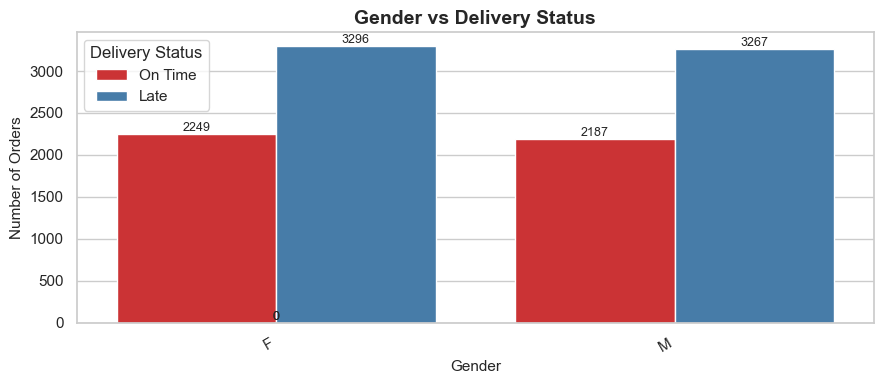

In [22]:
# Global style
sns.set(style="whitegrid", palette="Set1")

for col in categorical_cols:
    plt.figure(figsize=(9, 4))

    ax = sns.countplot(
        x=col,
        hue='Reached.on.Time_Y.N',
        data=df,
        order=df[col].value_counts().index
    )

    # Titles & labels
    ax.set_title(f"{col} vs Delivery Status", fontsize=14, fontweight="bold")
    ax.set_xlabel(col, fontsize=11)
    ax.set_ylabel("Number of Orders", fontsize=11)

    # Rotate x labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

    # Improve legend
    ax.legend(
        title="Delivery Status",
        labels=["On Time", "Late"]
    )

    # Add counts on bars
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9
        )

    plt.tight_layout()
    plt.savefig("7.png", dpi=300, bbox_inches='tight')
    plt.show()


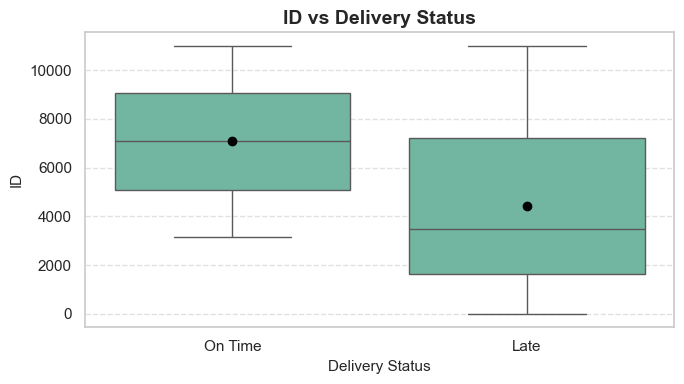

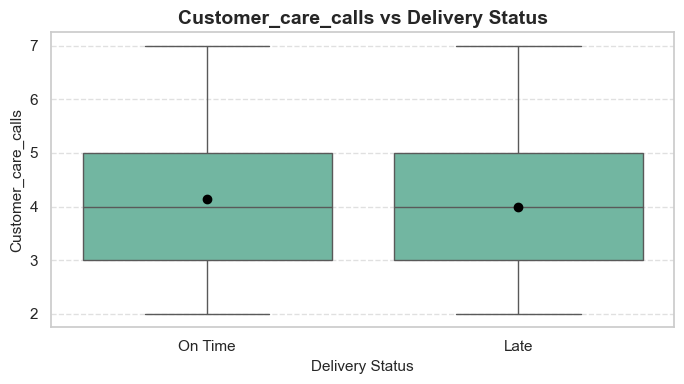

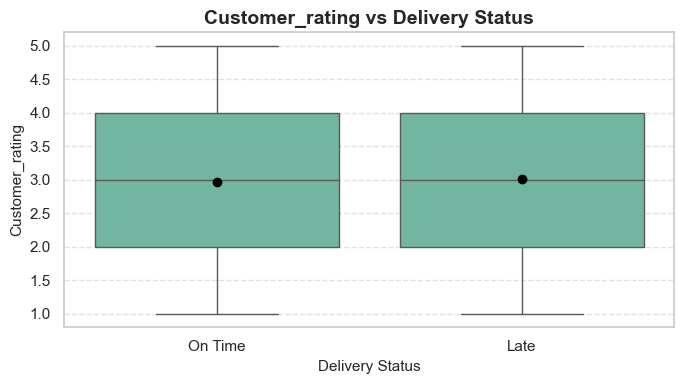

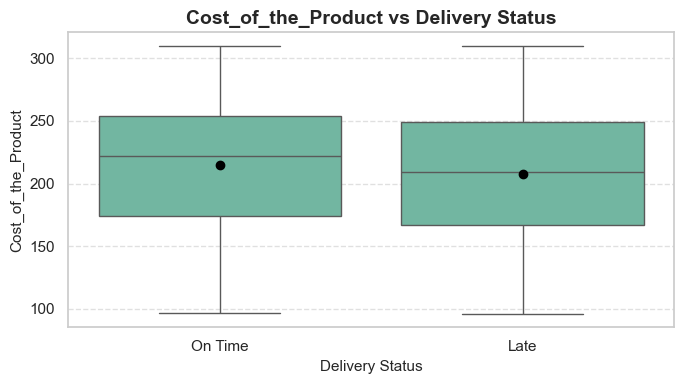

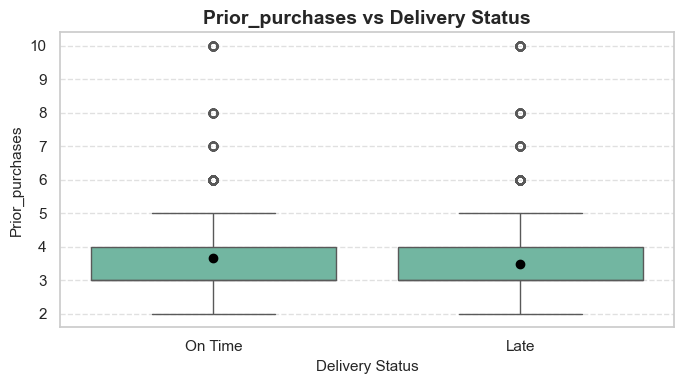

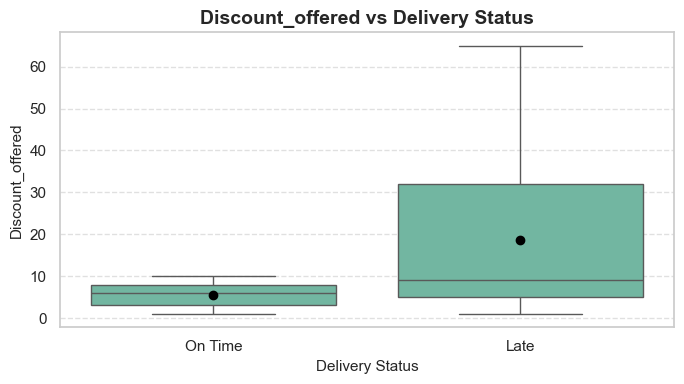

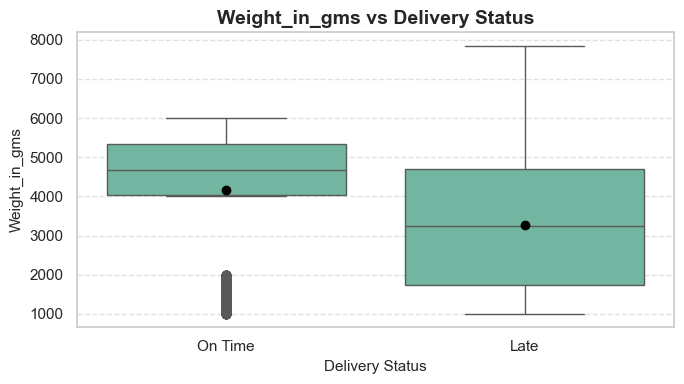

In [23]:
# Set global style
sns.set(style="whitegrid", palette="Set2")

for col in num_features:
    plt.figure(figsize=(7, 4))

    ax = sns.boxplot(
        x='Reached.on.Time_Y.N',
        y=col,
        data=df,
        showmeans=True,
        meanprops={
            "marker": "o",
            "markerfacecolor": "black",
            "markeredgecolor": "black",
            "markersize": 6
        }
    )

    # Titles & labels
    ax.set_title(f"{col} vs Delivery Status", fontsize=14, fontweight="bold")
    ax.set_xlabel("Delivery Status", fontsize=11)
    ax.set_ylabel(col, fontsize=11)

    # Replace numeric labels with readable text
    ax.set_xticklabels(["On Time", "Late"])

    # Improve grid
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.savefig("8.png", dpi=300, bbox_inches='tight')
    plt.show()


In [24]:
# Correlation matrix for numerical features
corr_matrix = df[numerical_cols].corr()
corr_matrix

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


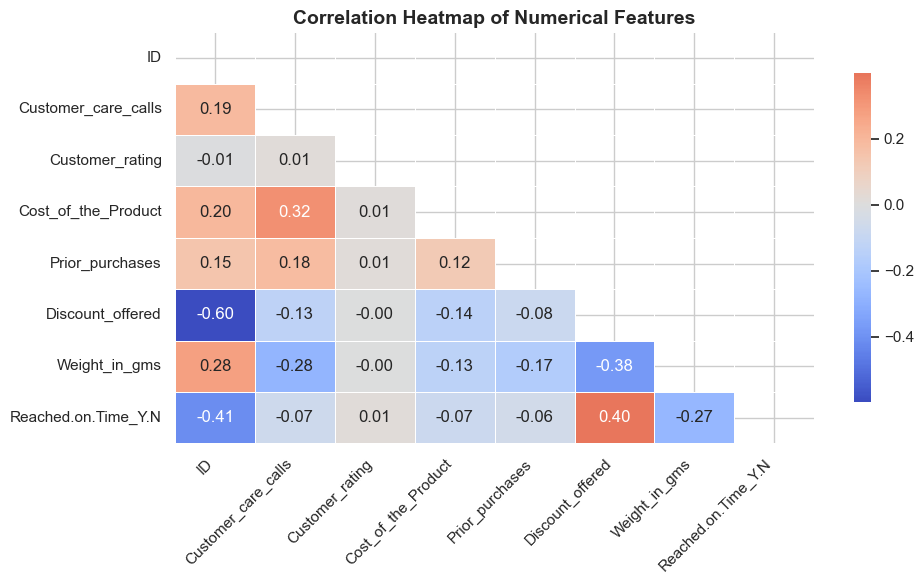

In [25]:
plt.figure(figsize=(10, 6))

# Mask upper triangle (reduces clutter)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title(
    "Correlation Heatmap of Numerical Features",
    fontsize=14,
    fontweight="bold"
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig("9.png", dpi=300, bbox_inches='tight')
plt.show()


In [26]:
# Drop ID column (not useful for prediction)
df.drop(columns=['ID'], inplace=True)

## Feature Engineering
We create and transform features to improve model performance. This includes encoding categorical variables and removing irrelevant columns.

In [27]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols


Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')

In [28]:
# Initialize label encoder
le = LabelEncoder()

# Apply label encoding
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [29]:
df.head()


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1
3,1,0,3,3,176,4,2,1,10,1177,1
4,2,0,2,2,184,3,2,0,46,2484,1


In [30]:
# Define features and target
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']


## Train-Test Split
We split the data into training and testing sets to evaluate model performance on unseen data. This helps prevent overfitting and ensures robust evaluation.

In [31]:
X.shape, y.shape


((10999, 10), (10999,))

In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [33]:
X_train.shape, X_test.shape


((8799, 10), (2200, 10))

In [34]:
# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

## Model Building
We build and train several classification models, including Logistic Regression, Decision Tree, Random Forest, and K-Nearest Neighbors, to predict on-time delivery.

In [36]:
lr_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.6477272727272727

In [37]:
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_lr))


Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.54      0.84      0.66       887
           1       0.83      0.51      0.64      1313

    accuracy                           0.65      2200
   macro avg       0.69      0.68      0.65      2200
weighted avg       0.71      0.65      0.65      2200



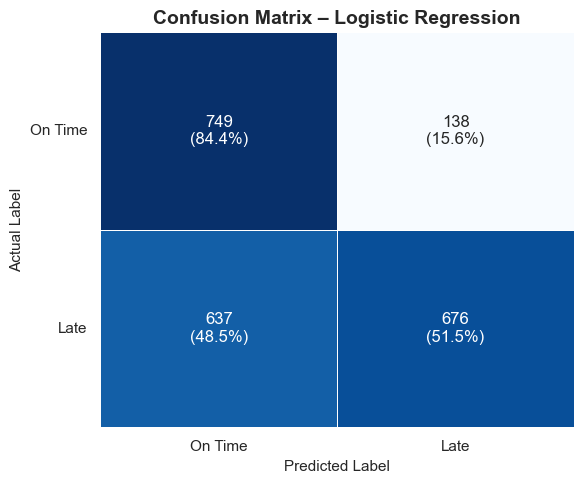

In [38]:
plt.figure(figsize=(6, 5))

cm_lr = confusion_matrix(y_test, y_pred_lr)

# Convert counts to percentages
cm_percent = cm_lr / cm_lr.sum(axis=1, keepdims=True) * 100

# Custom annotations: count + percentage
annotations = np.array([
    [f"{cm_lr[i, j]}\n({cm_percent[i, j]:.1f}%)" for j in range(cm_lr.shape[1])]
    for i in range(cm_lr.shape[0])
])

sns.heatmap(
    cm_lr,
    annot=annotations,
    fmt="",
    cmap="Blues",
    linewidths=0.5,
    cbar=False
)

plt.title("Confusion Matrix – Logistic Regression", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label", fontsize=11)
plt.ylabel("Actual Label", fontsize=11)

# Replace 0/1 with readable labels
plt.xticks([0.5, 1.5], ["On Time", "Late"])
plt.yticks([0.5, 1.5], ["On Time", "Late"], rotation=0)

plt.tight_layout()
plt.show()


In [39]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,        # prevents overfitting
    min_samples_split=10
)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [40]:
# Predict on test data
y_pred_dt = dt_model.predict(X_test)


In [41]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt


0.6790909090909091

In [42]:
print("Classification Report - Decision Tree")
print(classification_report(y_test, y_pred_dt))


Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.57      0.86      0.68       887
           1       0.85      0.56      0.67      1313

    accuracy                           0.68      2200
   macro avg       0.71      0.71      0.68      2200
weighted avg       0.74      0.68      0.68      2200



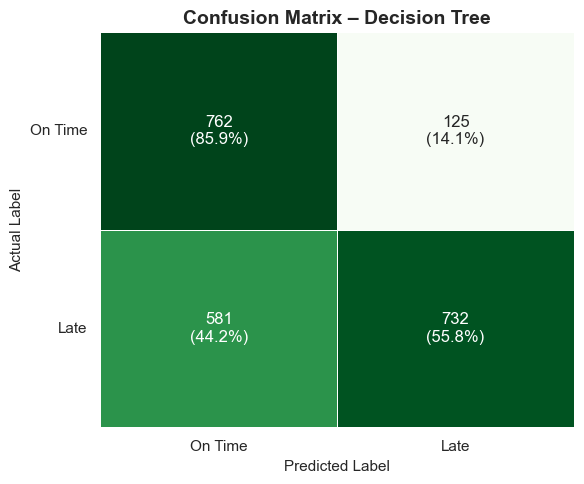

In [43]:

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 5))

# Convert counts to percentages
cm_percent = cm_dt / cm_dt.sum(axis=1, keepdims=True) * 100

# Custom annotations: count + percentage
annotations = np.array([
    [f"{cm_dt[i, j]}\n({cm_percent[i, j]:.1f}%)" for j in range(cm_dt.shape[1])]
    for i in range(cm_dt.shape[0])
])

sns.heatmap(
    cm_dt,
    annot=annotations,
    fmt="",
    cmap="Greens",
    linewidths=0.5,
    cbar=False
)

plt.title("Confusion Matrix – Decision Tree", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label", fontsize=11)
plt.ylabel("Actual Label", fontsize=11)

# Replace numeric labels
plt.xticks([0.5, 1.5], ["On Time", "Late"])
plt.yticks([0.5, 1.5], ["On Time", "Late"], rotation=0)

plt.tight_layout()
plt.show()



In [44]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=300,          # more trees = better performance
    max_depth=12,              # controls overfitting
    min_samples_split=10,
    class_weight='balanced',   # handles class imbalance
    random_state=42,
    n_jobs=-1                  # use all cores
)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_split=10, n_estimators=300, n_jobs=-1,
                       random_state=42)

In [45]:
# Predict on test data
y_pred_rf = rf_model.predict(X_test)


In [46]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf


0.6781818181818182

In [47]:
print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.56      0.97      0.71       887
           1       0.96      0.48      0.64      1313

    accuracy                           0.68      2200
   macro avg       0.76      0.73      0.67      2200
weighted avg       0.80      0.68      0.67      2200



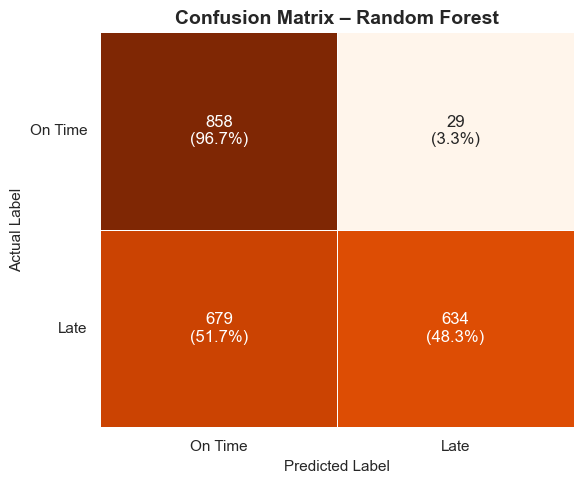

In [48]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))

# Convert counts to percentages
cm_percent = cm_rf / cm_rf.sum(axis=1, keepdims=True) * 100

# Custom annotations: count + percentage
annotations = np.array([
    [f"{cm_rf[i, j]}\n({cm_percent[i, j]:.1f}%)" for j in range(cm_rf.shape[1])]
    for i in range(cm_rf.shape[0])
])

sns.heatmap(
    cm_rf,
    annot=annotations,
    fmt="",
    cmap="Oranges",
    linewidths=0.5,
    cbar=False
)

plt.title("Confusion Matrix – Random Forest", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label", fontsize=11)
plt.ylabel("Actual Label", fontsize=11)

# Replace numeric labels with readable ones
plt.xticks([0.5, 1.5], ["On Time", "Late"])
plt.yticks([0.5, 1.5], ["On Time", "Late"], rotation=0)

plt.tight_layout()
plt.show()



In [49]:
from sklearn.neighbors import KNeighborsClassifier

k_values = range(3, 31, 2)
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_knn)
    knn_accuracies.append(acc)


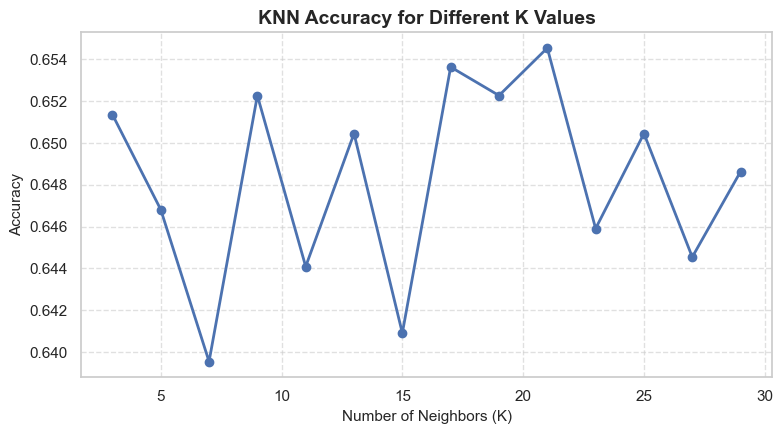

In [50]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 4.5))

plt.plot(
    k_values,
    knn_accuracies,
    marker='o',
    linewidth=2
)

plt.xlabel("Number of Neighbors (K)", fontsize=11)
plt.ylabel("Accuracy", fontsize=11)
plt.title(
    "KNN Accuracy for Different K Values",
    fontsize=14,
    fontweight="bold"
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [51]:
# Train final KNN model
knn_model = KNeighborsClassifier(n_neighbors=15)

knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=15)

In [52]:
y_pred_knn = knn_model.predict(X_test_scaled)


In [53]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn


0.6409090909090909

In [54]:
print("Classification Report - KNN")
print(classification_report(y_test, y_pred_knn))


Classification Report - KNN
              precision    recall  f1-score   support

           0       0.55      0.64      0.59       887
           1       0.73      0.64      0.68      1313

    accuracy                           0.64      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.64      0.64      2200



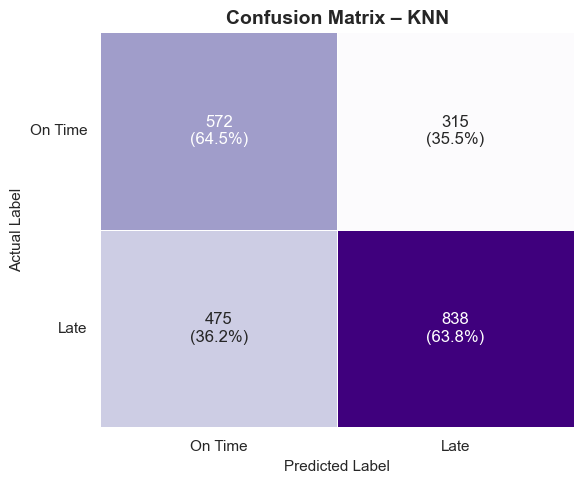

In [55]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 5))

# Convert counts to percentages (row-wise)
cm_percent = cm_knn / cm_knn.sum(axis=1, keepdims=True) * 100

# Custom annotations: count + percentage
annotations = np.array([
    [f"{cm_knn[i, j]}\n({cm_percent[i, j]:.1f}%)" for j in range(cm_knn.shape[1])]
    for i in range(cm_knn.shape[0])
])

sns.heatmap(
    cm_knn,
    annot=annotations,
    fmt="",
    cmap="Purples",
    linewidths=0.5,
    cbar=False
)

plt.title("Confusion Matrix – KNN", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Label", fontsize=11)
plt.ylabel("Actual Label", fontsize=11)

# Replace numeric labels
plt.xticks([0.5, 1.5], ["On Time", "Late"])
plt.yticks([0.5, 1.5], ["On Time", "Late"], rotation=0)

plt.tight_layout()
plt.show()

## Model Comparison
We compare the performance of all models to select the best one for predicting on-time delivery. This helps in making informed business decisions.

In [58]:
# Compute Precision, Recall, and F1 for each model (positive class = 1 -> Late)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Summary table
metrics_df = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'K-Nearest Neighbors'
    ],
    'Precision': [precision_lr, precision_dt, precision_rf, precision_knn],
    'Recall': [recall_lr, recall_dt, recall_rf, recall_knn],
    'F1 Score': [f1_lr, f1_dt, f1_rf, f1_knn],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_knn]
})

metrics_df.round(3)

,Model,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression,0.830,0.515,0.636,0.648
1,Decision Tree,0.854,0.558,0.675,0.679
2,Random Forest,0.956,0.483,0.642,0.678
3,K-Nearest Neighbors,0.727,0.638,0.680,0.641


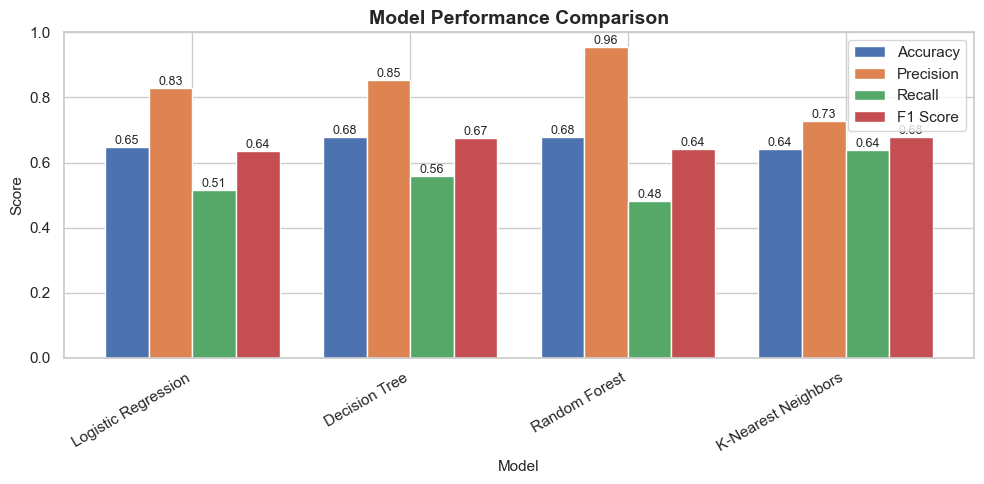

In [59]:
# Extract data
models = metrics_df['Model']
accuracy = metrics_df['Accuracy']
precision = metrics_df['Precision']
recall = metrics_df['Recall']
f1 = metrics_df['F1 Score']

x = np.arange(len(models))
width = 0.2

# Create figure
plt.figure(figsize=(10, 5))

# Bar plots
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1 Score')

# Titles and labels
plt.title("Model Performance Comparison", fontsize=14, fontweight='bold')
plt.xlabel("Model", fontsize=11)
plt.ylabel("Score", fontsize=11)
plt.xticks(x, models, rotation=30, ha='right')
plt.ylim(0, 1)

# Add value labels
for i in range(len(models)):
    plt.text(x[i] - 1.5*width, accuracy[i], f"{accuracy[i]:.2f}", ha='center', va='bottom', fontsize=9)
    plt.text(x[i] - 0.5*width, precision[i], f"{precision[i]:.2f}", ha='center', va='bottom', fontsize=9)
    plt.text(x[i] + 0.5*width, recall[i], f"{recall[i]:.2f}", ha='center', va='bottom', fontsize=9)
    plt.text(x[i] + 1.5*width, f1[i], f"{f1[i]:.2f}", ha='center', va='bottom', fontsize=9)

# Legend and layout
plt.legend()
plt.tight_layout()

# Save and show
plt.savefig("model_performance_comparison.png", dpi=300, bbox_inches='tight')
plt.show()




In [60]:
# Extract feature importance from Random Forest
feature_importances = rf_model.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
8,Discount_offered,0.379871
9,Weight_in_gms,0.326705
4,Cost_of_the_Product,0.107671
5,Prior_purchases,0.055905
2,Customer_care_calls,0.037397
3,Customer_rating,0.026146
0,Warehouse_block,0.025448
1,Mode_of_Shipment,0.015780
6,Product_importance,0.015262
7,Gender,0.009815


## Feature Importance
We analyze which features have the most impact on delivery outcomes. This provides valuable insights for business strategy and operational improvements.

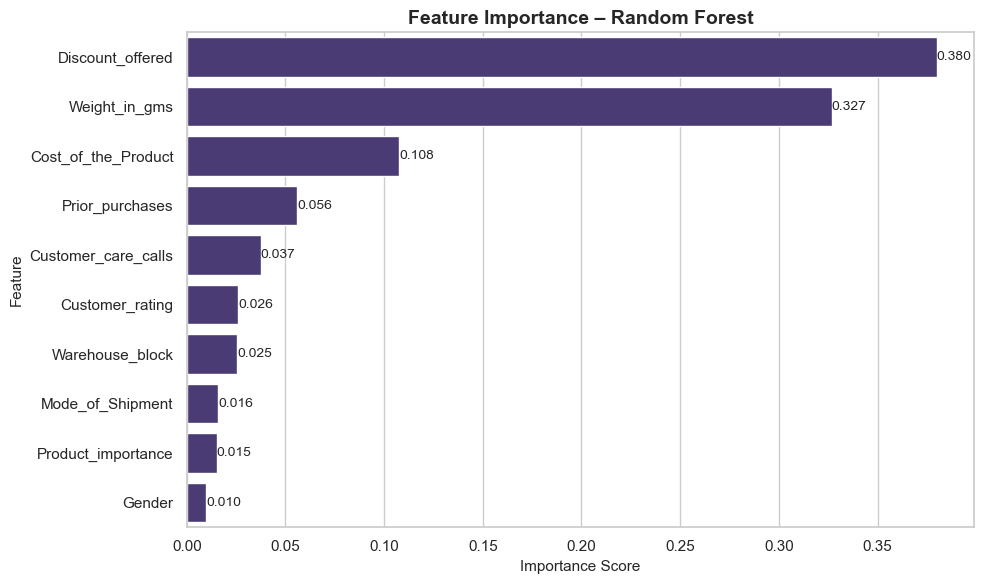

In [61]:
sns.set(style="whitegrid", palette="viridis")

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.sort_values(
        by='Importance',
        ascending=False
    )
)

# Title & labels
ax.set_title(
    "Feature Importance – Random Forest",
    fontsize=14,
    fontweight="bold"
)
ax.set_xlabel("Importance Score", fontsize=11)
ax.set_ylabel("Feature", fontsize=11)

# Add importance values on bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_width():.3f}",
        (p.get_width(), p.get_y() + p.get_height() / 2),
        va='center',
        ha='left',
        fontsize=10
    )

plt.tight_layout()
plt.show()



## Conclusion

This project demonstrates how machine learning techniques can be effectively used to predict delivery outcomes and support data-driven business decision-making. By analyzing key operational and customer-related factors, the model provides valuable insights into delivery performance. Future enhancements may include integrating external data sources such as weather and traffic conditions, adopting advanced modeling techniques, and deploying the solution for real-time prediction use cases.

---

## Business Insights

- **Product Weight:** Heavier products are more likely to experience delivery delays, indicating the need for specialized logistics handling and planning.
- **Discount Offered:** Higher discounts often coincide with increased delivery delays, likely due to a surge in order volumes during promotional campaigns.
- **Mode of Shipment:** Certain shipment modes contribute more significantly to late deliveries, suggesting opportunities for optimization in transportation planning.
- **Warehouse Block:** Delivery performance varies across warehouse blocks, highlighting areas where operational improvements can be implemented.
- **Customer Behavior:** Customers with a higher number of prior purchases exhibit distinct delivery patterns, which can be leveraged for shipment prioritization.

---

## Business Recommendations

- Optimize logistics strategies for handling high-weight products.
- Strengthen delivery infrastructure and capacity during promotional periods.
- Improve operational efficiency in underperforming warehouse blocks.
- Use predictive insights to set realistic delivery expectations and enhance customer satisfaction.

---

## Future Scope

- Incorporate external factors such as weather and traffic data to improve prediction accuracy.
- Apply advanced ensemble models such as **XGBoost** for better performance.
- Perform hyperparameter tuning to further optimize model results.
- Deploy the model as a real-time delivery prediction system for business use.
